Blog Post: https://medium.com/@cynthia_vu/deep-learning-assignment-natural-language-processing-5942fc19f6cb

In [55]:
import keras
keras.__version__

'2.1.3'

In [56]:
from keras.layers import SimpleRNN

In [57]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_36 (SimpleRNN)    (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [58]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_37 (SimpleRNN)    (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [59]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_38 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_39 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_40 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_41 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [60]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [61]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(46, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_42 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 46)                1518      
Total params: 323,598
Trainable params: 323,598
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 16s 2ms/step - loss: 2.8322 - acc: 0.2617 - val_loss: 2.4317 - val_acc: 0.3450
Epoch 2/10
7185/7185 [==============================] - 14s 2ms/step - loss: 2.4138 - acc: 0.3534 - val_loss: 2.3963 - val_acc: 0.3450
Epoch 3/10
7185/7185 [==============================] - 14s 2ms/step - loss: 2.3416 - acc: 0.3751 - val_loss: 2.2934 - val_acc: 0.3767
Epoch 4/10
7185/7185 [==============================] - 14s 2ms/step - loss: 2.2163 - acc: 0.4315 - val_loss: 2.2252 - val_acc: 0.3923
Epoch 5/10
7185/7185 [==============================] - 14s 2ms/step - loss: 2.3784 - acc: 0.4178 - val_loss: 2.1993 - val_acc: 0.3951
Epoch 6/10
7185/7185 [==============================] - 13s 2ms/step - loss: 2.0362 - acc: 0.4706 - val_loss: 2.2047 - val_acc: 0.4018
Epoch 7/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.9164 - acc: 0.4976 - val_loss: 2.0512 - val_acc: 0.4346
Epoch 8

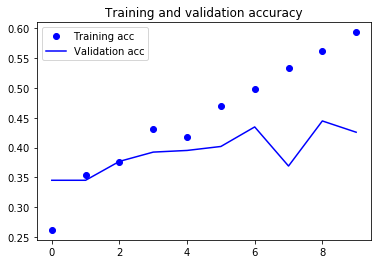

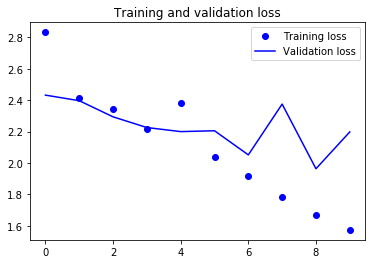

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [64]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_31 (Dense)             (None, 46)                1518      
Total params: 329,838
Trainable params: 329,838
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 42s 6ms/step - loss: 2.7326 - acc: 0.3459 - val_loss: 2.4138 - val_acc: 0.3450
Epoch 2/10
7185/7185 [==============================] - 41s 6ms/step - loss: 2.2532 - acc: 0.3697 - val_loss: 2.1894 - val_acc: 0.4663
Epoch 3/10
7185/7185 [==============================] - 42s 6ms/step - loss: 2.0125 - acc: 0.4100 - val_loss: 1.9252 - val_acc: 0.4786
Epoch 4/10
7185/7185 [==============================] - 42s 6ms/step - loss: 1.8702 - acc: 0.4820 - val_loss: 1.9412 - val_acc: 0.5147
Epoch 5/10
7185/7185 [==============================] - 40s 6ms/step - loss: 1.7957 - acc: 0.5151 - val_loss: 1.8315 - val_acc: 0.5309
Epoch 6/10
7185/7185 [==============================] - 41s 6ms/step - loss: 2.1023 - acc: 0.4941 - val_loss: 2.4761 - val_acc: 0.4752
Epoch 7/10
7185/7185 [==============================] - 40s 6ms/step - loss: 1.7620 - acc: 0.5567 - val_loss: 1.8856 - val_acc: 0.4953
Epoch 8

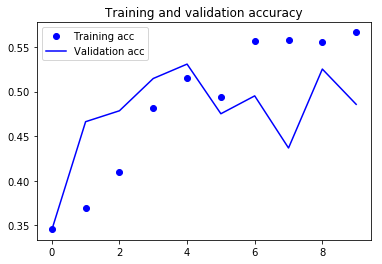

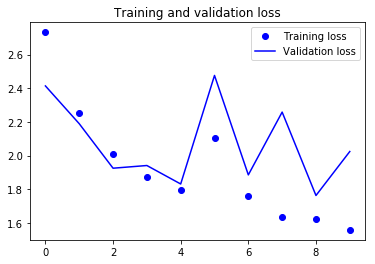

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()